# Python snippets

By Lee Zong Xun 

Code snippets are organized by topics and usually have a coherent flow to them.
Topics covered (in Python): 
1. Numerical and graphical summaries
2. Robust estimators
3. Categorical Data Analysis
4. Hypothesis Testing (One and two samples) 
5. Anova
6. Regression Analysis
7. Simulation
8. Resampling

## Useful imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
import scipy.stats as scst
import pylab
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

%matplotlib inline
sns.set(style="darkgrid") # make the plot (like histogram) has clearer looking

## Import data

In [3]:
data = pd.read_csv(r"C:\Users\thend\OneDrive\Documents\University\Y2S1\ST2137\Data\crab.csv", sep=",")
data = pd.DataFrame(data)
# mimic attach in R
for col in data.columns:
    globals()[col] = data[col]
    
def summary(data): 
    print(
        'min: ',min(data),
        "\nQ1: ", np.quantile(data,0.25), 
        "\nmean: ", st.mean(data), 
        "\nQ2: ", st.median(data),  
        "\nQ3: ", np.quantile(data, 0.75),  
        "\nmax: ", max(data),
        "\nrange: ", min(data), max(data),
        "\nvar: ", st.variance(data), 
        "\nsd: ", st.stdev(data), 
        "\nIQR: ", scst.stats.iqr(data)
    )
    
data.describe()
data
# summary(data["weight"])

,color,spine,width,satell,weight
0,3,3,28.3,8,3.050
1,4,3,22.5,0,1.550
2,2,1,26.0,9,2.300
3,4,3,24.8,0,2.100
4,4,3,26.0,4,2.600
...,...,...,...,...,...
168,4,3,26.1,3,2.750
169,4,3,29.0,4,3.275
170,2,1,28.0,0,2.625
171,5,3,27.0,0,2.625


## Write files

In [53]:
#  Write the file 'data' to a csv file called 'new_file'
# data = pd.DataFrame(data)
# data.to_csv("new_file.csv")

## Dataframe Operations

In [54]:
# concat two dataframes along the columns, axis = 1
y = pd.DataFrame([1 if num > 0 else 0 for num in data["satell"]], columns=[">1 satell"])
data_test = pd.concat([data, y], axis = 1)

# select two columns out of n columns
# data_text = pd.DataFrame(data_test, columns = ['id', '>1 satell'])

# merge operates similar to JOIN. It joins two datasets on the specified column. 
# data_new = pd.merge(data, data_text, on = 'id')


## Summarizing Data

### Estimating sigma (MAD AND IQR)

In [ ]:
# print(st.median(data_test.weight - st.median(data_test.weight)))
print(scst.iqr(data_test.weight) / 1.35) 
print(st.stdev(data_test.weight))
print(scst.median_abs_deviation(data_test.weight) * 1.4286) # THIS IS SIGMA!!! 

### Skew

In [57]:
def skew(x):
    n = len(x)
    y = [0]*n
    z = [0]*n
    for i in range(n):
        y[i] = (x[i] - st.mean(x))**2
        z[i] = (x[i] - st.mean(x))**3    
    m2 = st.mean(y)  
    m3 = st.mean(z)
    sk = (m3/pow(m2,3/2))*pow(n*(n-1),1/2)/(n-2)
    return(sk)

skew(data.width)

0.32635061222277506

### Kurtosis

In [58]:
def kurt(x):
    n = len(x)
    y = [0]*n
    z = [0]*n
    for i in range(n):
        y[i] = (x[i] - st.mean(x))**2
        z[i] = (x[i] - st.mean(x))**4    
    m2 = st.mean(y)  
    m4 = st.mean(z)
    kur = (n-1)/((n-2)*(n-3))*((n+1)*m4/(m2**2) - 3*(n-1))    
    return(kur)

kurt(data.width)

0.2036680547696415

### Barplots

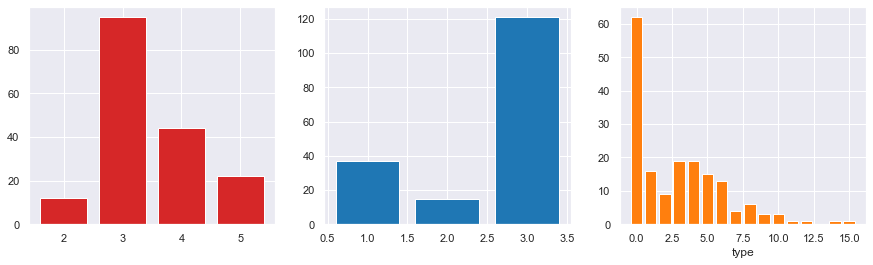

In [18]:
# specify that plot to be along 1 row, and 3 cols
fig, axes = plt.subplots(1, 3, figsize=(15,4)) 
# colours for each of the bar plots
colors = ['tab:red', 'tab:blue', 'tab:orange']
# barplots for each of the attributes
plots = ['color', "spine", "satell"]
for i, (ax, plot) in enumerate(zip(axes.flatten(), plots)):
    # for each attribute,sieve out the unique values
    types = data[plot].unique()
    # find count for each value
    counts = [data[data[plot] == type][plot].count() for type in types]
    # plot them on the axes
    ax.bar(types, counts, color=colors[i])
plt.xlabel('type')
plt.show()

Text(0.5, 1.0, 'bar plot')

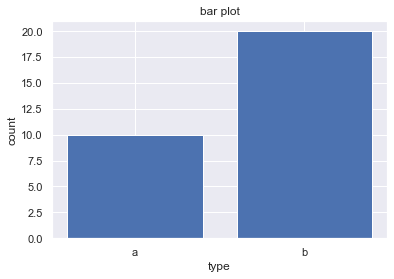

In [19]:
# code for a single attribute
# bar(types, counts, colors)
plt.bar(["a", "b"], [10, 20])
plt.xlabel("type")
plt.ylabel("count")
plt.title("bar plot")

### Histograms

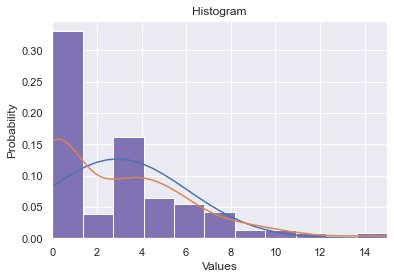

In [22]:
# for a single attribute
# x-values
l = list(np.arange(min(data["satell"]), max(data["satell"]), 0.5))
y = scst.norm.pdf(l, loc = st.mean(data['satell']), scale = st.stdev(data['satell'])) 

# normal overlay
plt.plot(l, y)

# density overlay
data['satell'].plot(kind = 'density', xlim=[0, max(data['satell'])]) # requires dataframe
plt.hist(data['satell'], 
    bins=11, density=True, color='C4')
plt.title('Histogram') 
plt.xlabel('Values') 
plt.ylabel('Probability') 
plt.show()

## Plotting multiple histograms
# fig, ax = plt.subplots(figsize=(10,5))
# data.hist(column=['width'], by='satell', ax=ax)
# plt.xlabel('') 
# plt.show()

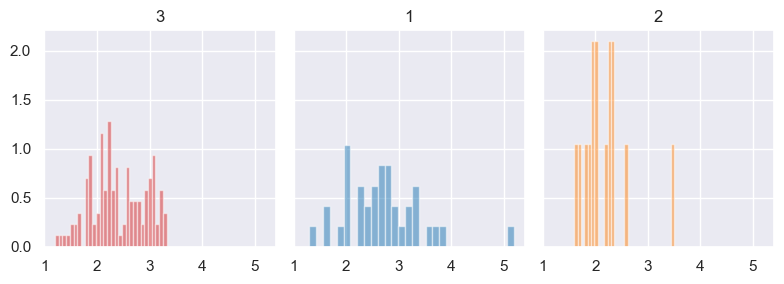

In [31]:
### Plotting multiple histograms
fig, axes = plt.subplots(1, 3, figsize=(8,3), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue', 'tab:orange']

for i, (ax, type) in enumerate(zip(axes.flatten(), data["spine"].unique())):
    x = data.loc[data.spine==type, 'weight']
    ax.hist(x, alpha=0.5, bins=30, 
        density=True, stacked=True, 
        label=str(type), color=colors[i])
    ax.set_title(type)

# plt.title('Probability Histogram by types', y=1.05, size=16)
# ax.set_xlim(0, 50); 
# ax.set_ylim(0, 1);
plt.tight_layout();

### Scatterplots

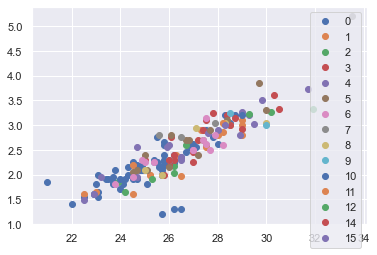

In [34]:
groups = data.groupby("satell")
for name, group in groups:
    plt.plot(group["width"], group["weight"], 
        marker="o", linestyle="", label=name)

plt.legend()
plt.show()

# # Alternatively        
# colors = ['tab:orange', 'tab:blue']
# for type in data_test['>1 satell'].unique(): # find the number of unique values in attr
#     width = data_test[data_test['>1 satell'] == type]["width"]
#     weight = data_test[data_test['>1 satell'] == type]["weight"]
    
#     plt.scatter(width, weight, 
#         color=colors[type], label=type)

#     print(type, ":", np.corrcoef(width, weight)[0, 1]) # correlation

# # End off 
# plt.legend()
# plt.show()

### Boxplots

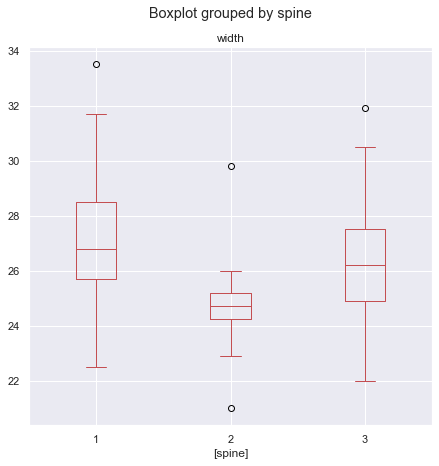

In [39]:
# plot of quantitative vs categorical
fig, ax = plt.subplots(figsize=(7,7))
data.boxplot(column=['width'], by=['spine'], ax=ax, color = 'r')
plt.show()

## Normality Checking

### QQ plot

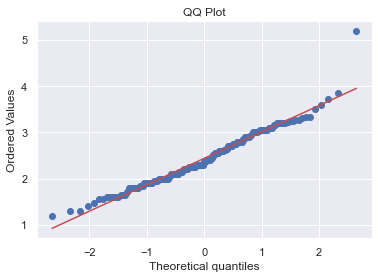

ShapiroResult(statistic=0.9647103548049927, pvalue=0.00022716292005497962)

In [42]:
# Take note of the axis swap
scst.probplot(data['weight'], dist="norm", plot=pylab)
pylab.title('QQ Plot') 
pylab.show()

# QQ plot for 3 groups in ONE Figure:
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize = (9, 3) ) # 9 is the width of figure; 3 is the height of figure


# ax = fig.add_subplot(1, 3, 1) #add_subplot(nrows, ncols, index, **kwargs)
# sm.graphics.qqplot(F, line='s', ax=ax)
# plt.title('QQ plot of F')


# ax = fig.add_subplot(1, 3, 2)
# sm.graphics.qqplot(M, line='s', ax=ax)
# plt.title('QQ plot of M')


# ax = fig.add_subplot(1, 3, 3)
# sm.graphics.qqplot(R, line='s', ax=ax)
# plt.title('QQ plot of R')


# fig.tight_layout()

# plt.show()


## Shapiro Test
scst.shapiro(data["weight"]) 

## Categorical Data Analysis

### Contingency Table

In [ ]:
# single attribute
pd.crosstab(index=data.satell, columns="count")
# # rxc table
pd.crosstab(data.satell, data.spine)

{'Yes': [36, 42], 'No': [60, 81]}

### Odds ratio, RR, and Sample Difference

In [56]:
data = {'Yes': [36,42], 'No': [60,81]}
df = pd.DataFrame(data, columns =['Yes', 'No'])

prob = df['Yes']/(df['Yes'] + df['No']) 
SD = prob[0] - prob[1] # this is sample difference
RR =  prob[0]/prob[1] # this is Relative Risk
odds = prob/(1-prob) # the odds of 'Yes'
OR = odds[0]/odds[1] # this is odds ratio

print(SD, RR, OR)


### Alternative
import statsmodels.api as sm
table = np.array([[4,184], [2,260]])
new_table = sm.stats.Table(table)
print(new_table.fittedvalues) # expected values if the 2 variables are independent
sum_table = sm.stats.Table2x2(table) # table can be a crosstab
print(sum_table.summary(alpha = 0.05)) # we also get the 95% CI (LCB, UCB)

0.03353658536585363 1.0982142857142856 1.1571428571428568
[[  2.50666667 185.49333333]
 [  3.49333333 258.50666667]]
               Estimate   SE   LCB    UCB   p-value
---------------------------------------------------
Odds ratio        2.826        0.512 15.592   0.233
Log odds ratio    1.039 0.871 -0.669  2.747   0.233
Risk ratio        2.787        0.516 15.060   0.234
Log risk ratio    1.025 0.861 -0.662  2.712   0.234
---------------------------------------------------


### Chi-squared test

### Contingency Table

In [78]:
# single attribute
pd.crosstab(index=satell, columns="count")
# # rxc table
# pd.crosstab(satell, spine)

col_0,count
satell,
0,62
1,16
2,9
3,19
4,19
5,15
6,13
7,4
8,6


In [54]:
obs = np.array([[46,474], [37,516]])
# this will return: test statistic, p-value, dof, and expected values
scst.chi2_contingency(obs, correction = True)  # can be used with crosstabs (contingency table)

# rxc table
obs = np.array([[762,327,468], [484,239,477]])
scst.chi2_contingency(obs, correction = True)

(30.070149095754672,
 2.9535891832117595e-07,
 2,
 array([[703.67138194, 319.64526659, 533.68335147],
        [542.32861806, 246.35473341, 411.31664853]]))

### Fisher Exact Test

In [57]:
claritin = np.array([[4,184], [2,260]])
scst.fisher_exact(claritin, alternative='two-sided')

(2.8260869565217392, 0.24118420183181116)

### Mcnemar test

In [66]:
from statsmodels.stats.contingency_tables import mcnemar
x = np.array([[25,1], [17,7]])
# the McNemar test in R is equivalent to this 
# test in Python but using approximate p-value.
print(mcnemar(x, exact=False, correction=True))

# Should be used when table has small cell count
# print(mcnemar(x, exact=True, correction=True))

## manual calculation
statistic = (np.absolute(x[0, 1] - x[1, 0]) - 1) ** 2 / (x[0, 1] + x[1, 0]) #with continuity correction
p_value = scst.chi2.sf(statistic, 1)
print('pvalue', p_value)

pvalue      0.00040695201744495946
statistic   12.5
pvalue 0.00040695201744495946


### Linear by Linear Test

In [69]:
import statsmodels.api as sm

## These are the columns
table = np.array([[17066, 14464, 788, 126, 37], [48, 38, 5, 1, 1]]) # take note that these are in rows
ct = sm.stats.Table(np.asarray(table)) # can use crosstab too


# scores for 2 rows
row_scores = np.asarray([0, 1])

# scores for 5 columns
col_scores = np.asarray([0,0.5,1.5, 4, 7]) 

# z-score^2 is the test statistic
ans = ct.test_ordinal_association(row_scores=row_scores, col_scores=col_scores)
print(ans)

null_mean   26.307745441149383
null_sd     4.366536892904495
pvalue      0.010371589916631332
statistic   37.5
zscore      2.5631879068828503


### Manual Linear by Linear Test

In [176]:
def linear_by_linear_test(col1, col2, u, v):
    '''
    u refers to the row scores
    v refers to the col scores
    '''
    matrix = [col1, col2]
    row_total = [a + b for a,b in zip(col1, col2)]
    col_total = [sum(col1), sum(col2)]
    n = sum(row_total)
    
    row_p = [x / n for x in row_total]
    ubar = sum([a*b for a,b in zip(row_p, u)])
    col_p = [x / n for x in col_total]
    vbar = sum([a*b for a,b in zip(col_p, v)])
    
    numerator = 0
    for i in range(len(u)):
        for j in range(len(v)):
            ui = u[i]
            vj = v[j]
            pij = matrix[j][i] / n
            numerator += (ui - ubar) * (vj - vbar) * pij

    
    denominator = (
        sum([row_p[i] * (u[i] - ubar)**2 
            for i in range(len(u))]) * \
        sum([col_p[j] * (v[j] - vbar)**2 
            for j in range(len(v))]))**0.5
    
    r = numerator / denominator
    M = (n-1) * r**2
    p_value = 1- scst.chi2.cdf(M, 1)
    return "M is {} and two sided p-value is {}".format(M,p_value)

## Hypothesis Testing

## Equal variance test

In [ ]:
# Test normality for each group
groups = data.groupby("group")
for name, group in groups:
  print(shapiro(group['time']))

# bartlett (for normal data)
scst.bartlett(data['glaucoma'], data['unaffected'])  

# levene (for unknown distributions)
scst.levene(data['glaucoma'], data['unaffected'])  

### T-Test (One sample)

In [98]:
def ttest_1sample(data, pop_mean, alpha, alternative="two-sided"):
  sig_level = 1 - (alpha / 2)
  df = len(data) - 1
  CI = [st.mean(data) - scst.t.ppf(sig_level, df)*math.sqrt(st.variance(data)/len(data)), st.mean(data) + scst.t.ppf(sig_level, df)*math.sqrt(st.variance(data)/len(data))]
  print(f"Confidence Interval: {CI}")
  # Built-in 1 sample t-test
  return scst.ttest_1samp(data, popmean=pop_mean, alternative=alternative) # by default, this is a 2 sided test.

ttest_1sample(width, 26, 0.05)

Confidence Interval: [25.98233883437627, 26.6153490268954]


Ttest_1sampResult(statistic=1.8637100880695137, pvalue=0.06406694845034848)

### Paired T-Test (for dependent sample)

In [ ]:
# paired t-test for the matched of "glaucoma" and "unaffected"
test = scst.ttest_rel(data['glaucoma'], data['unaffected'], axis=0) #two sided test

# two sided test has p-value  = 0.0968 with a negative statistic
# hence, 1 sided p-value (left test) has p-value of 0.0484
# right test is 1 - 0.0484
# confidence interval can be constructed similarly as above

### Wilcoxon Signed Rank Test

In [ ]:
t2, p2  = scst.wilcoxon(x = diff, y=None, zero_method='wilcox', correction=False, alternative='two-sided')
print('Test statistic is: ', t2) 
print( 'p-value is: ',p2)

# exact test with correction=False
# In Python, by default, the test statistic is min (V+, V-). In R, the test statistics is V+
# p-value from Python might slightly different from R

### Two Sample T-Test (Independent)

In [ ]:
#2 independent samples t-test:
# import statsmodels.api as sa
# test= sa.weightstats.ttest_ind(data['glaucoma'], data['unaffected'], alternative='smaller', usevar='pooled', value=0) # using pooled variance, usevar="unequal" if variance is not equal
# print(test)  # test_statistic, p-val, and degree of freedom

# Alternatively
scst.ttest_ind(new, old, axis=0, equal_var=True, alternative="greater")#, alternative='two-sided') # 2-sided test

### Wilcoxon Rank Sum Test (ManWhitney)

In [ ]:
test6 = scst.mannwhitneyu(plant_one, plant_two, use_continuity=True, alternative='two-sided')
#this test is Wilcoxon Rank Sum test
print(test6) # statistic, p-value

## Anova

In [ ]:
mod = ols('sales ~ location', data=data).fit()
anova = sm.stats.anova_lm(mod, typ=1) # typ = 1 or 2
print(anova)

### Kruskal Wallis Test

In [ ]:
####  KRUSKALL-WALLIS TEST
from scipy.stats import kruskal

# split them into groups
kruskal = kruskal(data.time[(data.group==1)],data.time[(data.group==2)],data.time[(data.group==3)],data.time[(data.group==4)])
print(kruskal)

### Bonferroni

In [ ]:
import statsmodels.stats.multicomp as mc

comparison = mc.MultiComparison(data.sales, data.location)
result, tbl1, tbl2 = comparison.allpairtest(scst.ttest_ind, method= "bonf", alpha = 0.05)
# by default, the Family Wise Error Rate (alpha) is 0.05. Can try with alpha = 0.1
# for each pair, a two independent sample t-test is performed.
print(result)


## If the groups are not normal 
result, tbl1, tbl2 = comparison.allpairtest(scst.mannwhitneyu, method= "bonf")
print(result)

### Turkey

In [ ]:
### TUKEY
import statsmodels.stats.multicomp as mc

# sales by location
comparison = mc.MultiComparison(data.sales, data.location)
tukey = comparison.tukeyhsd(alpha = 0.05)
print(tukey.summary() )

## Linear Regression

          weight    height       age
weight  1.000000  0.971650  0.923965
height  0.971650  1.000000  0.873101
age     0.923965  0.873101  1.000000


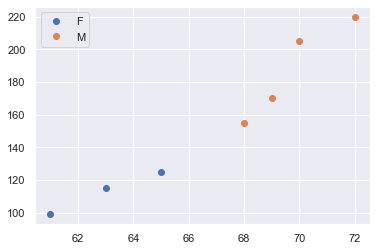

In [104]:
data = pd.read_csv (r"C:\Users\thend\OneDrive\Documents\University\Y2S1\ST2137\Data\ex10_1.txt", sep = " ")

# declare with Oython that: variable gender is categorical
data.gender = data.gender.astype('category')  

# correlation between weight and height also can be computed as
# print( np.corrcoef(data['weight'], data['height']) )

# matrix of correlation
quant = ['weight','height','age']
corr_matrix = data.loc[:,quant].corr()
print(corr_matrix)

## check linearity of height and weight
## scatter plot of height and weight classified by gender
groups = data.groupby("gender")
for name, group in groups:
    pyplot.plot(group["height"], group["weight"], marker="o", linestyle="", label=name)
    
pyplot.legend()
pyplot.show()


In [118]:
## FIRST WAY

model=ols("weight~height+age+gen+height*gen",data=data).fit() # similar to R
# NOTE: gender[T.M] means Male is chosen in the model, and Female is the REFERENCE.
# Here, we let python choose the reference group. One can create an indicator for gender by doing the following: 

## CREATING INDICATOR VARIABLE
n = len(data.weight) # sample size
gen = np.zeros(n)
gen[(data.gender == 'M')] = 1 # indicator for gender = M
# then we can use gen instead of gender to fit models.
print('gender', gen)


print(model.summary())
print(model.bse) # standard error for the coefficients
print('Mean Squared errors, MS-Res = ',model.mse_resid) # another name is residual mean square
print('Residual Standard Error = ', np.sqrt(model.mse_resid) ) # coefficient of determination

gender [1. 0. 0. 1. 1. 0. 1.]
                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     33.99
Date:                Wed, 16 Nov 2022   Prob (F-statistic):             0.0288
Time:                        16:48:38   Log-Likelihood:                -21.344
No. Observations:                   7   AIC:                             52.69
Df Residuals:                       2   BIC:                             52.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -186.6079 

c:\Users\thend\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [111]:
from statsmodels.formula.api import ols
# NOTE: Categorical variables will appear in the first row of the anova table

# NOTE: 
# typ = 1 gives a table the same as ***anova*** table of model in R, test the significance of a variable in the model WITHOUT the presence of variable below it.
# typ = 2 gives p-values the same as from ***t-test*** of model in R, help to test the significance of a variable in the model WITH the presence of all other variables.

anova11 = sm.stats.anova_lm(model, typ=1) #Anova of model 1 with typ = 1
print(anova11)

# the p-value here is similar to the p-value from t-test from summary(model) in R.
anova22 = sm.stats.anova_lm(model, typ=2) 
print(anova22)

# similar as typ = 2 but has the intercept included. the sum_sq and p-value in this table is similar as the Type II (SS2) in SAS.
print(sm.stats.anova_lm(model, typ=3) ) 

             df        sum_sq       mean_sq           F    PR(>F)
height      1.0  11880.327238  11880.327238  130.265625  0.007589
age         1.0    302.710505    302.710505    3.319166  0.210063
gen         1.0     52.682647     52.682647    0.577656  0.526607
height:gen  1.0    165.592326    165.592326    1.815690  0.310182
Residual    2.0    182.401570     91.200785         NaN       NaN
                sum_sq   df         F    PR(>F)
height      144.720939  1.0  1.586839  0.334864
age          62.169859  1.0  0.681681  0.495818
gen          52.682647  1.0  0.577656  0.526607
height:gen  165.592326  1.0  1.815690  0.310182
Residual    182.401570  2.0       NaN       NaN
                sum_sq   df         F    PR(>F)
Intercept    50.415934  1.0  0.552802  0.534654
height      102.592269  1.0  1.124906  0.400016
age          62.169859  1.0  0.681681  0.495818
gen         155.299442  1.0  1.702830  0.321861
height:gen  165.592326  1.0  1.815690  0.310182
Residual    182.401570  2.0 

Leverage: [False False False False False False False]
Cooks distance: [False False False False False False  True]


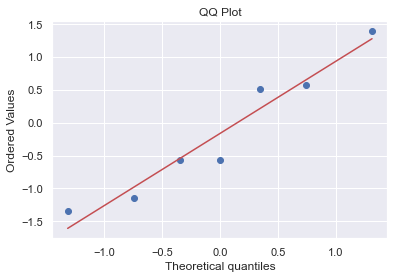

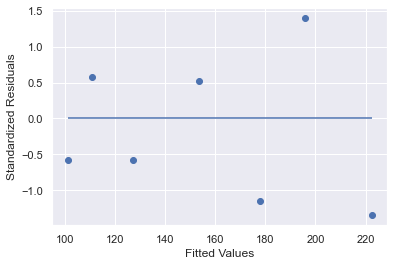

In [124]:

# Predicted values of the model (to plot fitted with SR)
fitted = model.fittedvalues

# the RAW residuals of model 
raw_resid = model.resid

# standardized residuals (check normality with QQ plot)
analysis = model.get_influence() 
SR = analysis.resid_studentized_internal

# leverage (hat values)
leverage = analysis.hat_matrix_diag
print('Leverage:', leverage > (2 * (model.df_model + 1) / len(data.weight)) )

#Cook's distance values (and p-values) as tuple of arrays
cooks_d, p = analysis.cooks_distance
print("Cooks distance:", cooks_d > 1)

# plotting QQ Plot of SR
import matplotlib.pyplot as pyplot
scst.probplot(SR, dist="norm", plot=pyplot)
pyplot.title('QQ Plot') 
pyplot.show()

## Plot of fitted values against SR
fitted = model.fittedvalues

import matplotlib.pyplot as pyplot
pyplot.scatter(fitted, SR,color='b')  
pyplot.xlabel('Fitted Values') 
pyplot.ylabel('Standardized Residuals') 
pyplot.hlines(0, xmin = min(fitted), xmax = max(fitted) )
pyplot.title('') 
pyplot.show() 

# Normaliy assumption: From the qq plot of SR, it has both right tail and left tail
# are heavier than normal. Hence, normality assmption might be violated.
# SR vs fitted: there are 4 outliers obviously with large |SR|.
# constant variance assumption and independent errors assumption are met.

In [128]:
## SECOND WAY TO FIT A LINEAR MODEL (Use this to predict)
import statsmodels
weight = data['weight']
n = len(weight) # data size
inter = [1]*n 
X = np.column_stack((inter, data['height'])) # X = matrix of 2 columns in the model, including column of value 1 for intercept and column of height

re = statsmodels.regression.linear_model.OLS(weight, X).fit()
print(re.summary())
print(re.bse) # standard error for the coefficients
print('Mean Squared errors, MS-Res = ',re.mse_resid)
print('Residual Standard Error = ', np.sqrt(re.mse_resid) )


## PREDICTION
newpoint = [1,1.8] # should match the # of variables (including intercept)
predictions = re.get_prediction(newpoint)

predictions.summary_frame(alpha=0.05) 
# predicted value is 2.652043 (under "mean")
# The 95% CI for the mean weight is mean_ci_lower and mean_ci_upper: (2.565803   ,    2.738282)

# BIG note: the name of variable is not shown in the output.
# we need to figure out the name based on the matrix X above

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     84.45
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           0.000256
Time:                        16:52:41   Log-Likelihood:                -26.068
No. Observations:                   7   AIC:                             56.14
Df Residuals:                       5   BIC:                             56.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -592.6446     81.542     -7.268      0.0

c:\Users\thend\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-572.500301,79.353535,-776.485058,-368.515545,-778.751027,-366.249575


## Simulation

In [19]:
## Uniform Distribution
x = np.random.uniform(0,1,6) # 6 numbers follow uni(0,1)

# Exponential Distribution 
x = np.random.exponential(1/5, 10) # 10 random numbers follow Exp(lambda=5) 

# Weibull Distribution
x = np.random.weibull(4, 10) # 10 random numbers with shape = 4.

# Normal Distribution 
n, mu, sigma = 10, 5, 1.5
x = np.random.normal(loc = mu, scale = sigma, size = n)

# Chisquared Distribution 
x = np.random.chisquare(df = 3, size = 10)

# Binomial Distribution
x = np.random.binomial(n = 100, p = 0.3, size = 10)

# Poisson Distribution
x = np.random.poisson(lam = 3, size = 10)

### Comparing 3 Estimators of Mean

In [24]:

# GENERATING DATA
M = 10000
n = 20
mu = 170
sd = 10
meanx = np.arange(M) # A vector of all sample means
medx = np.arange(M) # A vector of all sample medians
trmx = np.arange(M) # A vector of all sample 10% trimmed means
stdx = np.arange(M) # A vector of all sample standard deviations

# set seed
np.random.seed(10)

for i in range(M):
  # Generate a random sample of size n
  x = np.random.normal(loc = mu, scale = sd, size = n) 
  meanx[i] = st.mean(x) # Compute the mean of the i-th sample: T^1_i
  medx[i] = st.median(x) # Compute the median of the i-th sample: T^2_i
  trmx[i] = scst.trim_mean(x, 0.1) # Compute the 10% trimmed mean for the i-th sample, i.e. T^3_i
  stdx[i] <- st.stdev(x) # Compute the standard deviation for the i-th sample.

stat = np.asmatrix([meanx,medx,trmx])
stat = pd.DataFrame(stat) # sample mean at first, median second; trimmed mean at third.

# Compute mean of M sample means, medians, and trimmed means
simumean = stat.apply(np.mean, axis = 1)
# Compute sd of the M sample means, medians and 10% trimmed means
simustd = stat.apply(np.std, axis = 1)
#Compute the bias
realmu = np.empty(3); realmu.fill(mu)  # a vector of 3 values of mu = 170
simubias = simumean - realmu 

# Compute the MSE (Mean Square Error)
simumse = simubias**2 + simustd**2 
print(simumse) # meanx has the lowest MSE


### Coverage Probability of Confidence Interval

In [26]:
def simulateCI(meanx, stdx, mu, sample_size, simulation_size):
  t05 = scst.t.ppf(0.975, df)
  coverage = (meanx-t05*stdx/np.sqrt(sample_size) <= mu) &  (mu <= meanx+t05*stdx/ np.sqrt(sample_size))
  return sum(coverage)/simulation_size

### Simulating Hypothesis Testing

In [27]:
def checkHypo(sample_size, simulation_size):
  t05 = scst.t.ppf(0.975, sample_size-1)
  ttests = (meanx-mu)/(stdx/np.sqrt(sample_size))
  size = sum(abs(ttests) > t05)/simulation_size # probability of rejecting Ho
  return size 

## Resampling

In [29]:
## Generating random samples
from random import choices
x = [3.39, 3.30, 2.81, 3.03, 3.44, 3.07, 3.00] # this is the original sample 

# we want to have a re-sample of x.
choices(x, k=len(x))

[3.39, 3.0, 3.44, 3.0, 3.3, 2.81, 2.81]

### Nonparametric Bootstrap Estimate SE & BIAS of Estimator 

In [33]:
law = pd.read_csv(r"C:\Users\thend\OneDrive\Documents\University\Y2S1\ST2137\Data\lawschool.csv", sep = ",")

theta_hat = np.corrcoef(law.LSAT, law.GPA)[0,1]

R = 1000 # number of bootstrap replicates;
n = len(law.GPA) # sample size
theta_b = [] # storage for boostrap estimates 

for j in range(R):
    i = choices(range(n),k = n) # resampling n items
    LSATb = law.LSAT[i]
    GPAb = law.GPA[i]
    theta_b.append(round(np.corrcoef(LSATb,GPAb)[0, 1], ndigits = 3))

print('SE is ', np.std(theta_b))
bias = st.mean(theta_b) - theta_hat
print('Bias is ', bias)


SE is  0.12883928268971384
Bias is  -0.005480491289407197


### Bootstap Confidence Interval

In [36]:
R = 2000 # number of bootstrap replicates;
n = len(law.GPA) # sample size
theta_b = [] # storage for boostrap estimates 

alpha = 0.05
CL = 100*(1-alpha)

for j in range(R):
    i = choices(range(n),k = n)
    LSATb = law.LSAT[i]
    GPAb = law.GPA[i]
    theta_b.append(round( np.corrcoef(LSATb,GPAb)[0, 1], ndigits = 5) )


# BASIC CI:
basic_CI = (2*theta_hat - np.quantile(theta_b, (1-alpha/2) ), 
            2*theta_hat - np.quantile(theta_b, alpha/2) )
print("A ",CL,"% basic confidence interval is ", basic_CI)

# PERCENTILE CI:
perc_CI = (np.quantile(theta_b, alpha/2), np. quantile(theta_b,(1-alpha/2)) )
print("A ",CL,"% percentile confidence interval is ", perc_CI)

# NORMAL CI:
z = scst.norm.ppf(1-alpha/2) # to get the quantile from standard normal.
bias = st.mean(theta_b) - theta_hat
se = np.std(theta_b) 

normal_CI = (theta_hat - bias - z*se, theta_hat - bias + z*se )

print("A ",CL,"% normal confidence interval is ", normal_CI )


A  95.0 % basic confidence interval is  (0.5897074825788143, 1.0912934825788143)
A  95.0 % percentile confidence interval is  (0.4614555, 0.9630415)
A  95.0 % normal confidence interval is  (0.5199033595040108, 1.045929215653618)
